In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import csv

# Ця частина демонстрація ідеї чистки зображення

In [11]:
# зчитую зображення
img_target = cv2.imread('double.jpg',0)
img_test = cv2.imread('./4k/test_1.jpg', 0)

Обраховуємо ключові точки

In [12]:
hT, wT = img_target.shape
sift = cv2.SIFT_create(nfeatures=1000)
kp1, des1 = sift.detectAndCompute(img_target,None)
kp2, des2 = sift.detectAndCompute(img_test, None)

Створюємо матчер

In [13]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

Шукаємо відповідні ключові точки

In [14]:
matches = flann.knnMatch(des1,des2,k=2)
good =[]
for m,n in matches:
    if m.distance < 0.75 *n.distance:
        good.append(m)
print(len(good))

297


# Ось тут різниця від випадку, коли шукаємо зображення і зафорбовуємо його. Ми шукаємо тіж самі точки, але в **_findHomography_** змінюємо порядок аргументів. Спершу **_dstPts_**, а потім **_srcPts_**. За допмогою цього, ми зможемо вирізати зображення з фотографій.

In [15]:
srcPts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dstPts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)

Вирізаємо зображення

In [19]:
imgWarp = cv2.warpPerspective(img_test, matrix, (img_target.shape[1], img_target.shape[0]))

Результат

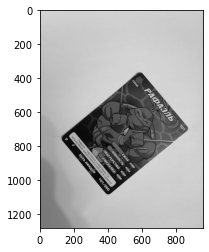

In [20]:
plt.imshow(img_test, 'gray')
plt.show()

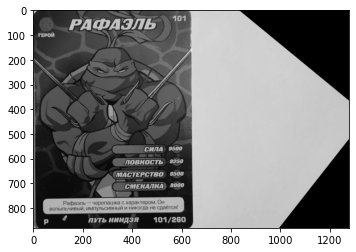

In [21]:
plt.imshow(imgWarp, 'gray')
plt.show()

# Ось тут тепер ми починаємо підготовлювати дані для CNN

In [5]:
# зчитуємо еталонні зображення
# rafael = cv2.imread('1.jpg')
# dragon = cv2.imread('2.jpg')
double = cv2.imread('double.jpg')

# обраховуємо ключові точки
# kp_rafael, des_rafael = sift.detectAndCompute(rafael, None)
# kp_dragon, des_dragon = sift.detectAndCompute(dragon, None)
kp_double, des_double = sift.detectAndCompute(double, None)

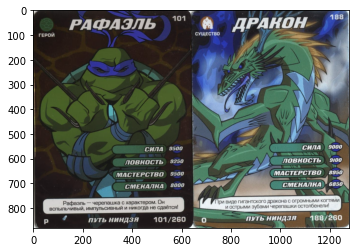

In [6]:
plt.imshow(double)
plt.show()

З **_csv_** файлів зчитую ім'я файлів і їхні labels

In [7]:
data_not_item = []
target_not_item = []

data_rafael = []
target_rafael = []

data_dragon = []
target_dragon = []

data_double = []
target_double = []

with open('not_item.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        data_not_item.append(row[0])
        target_not_item.append(int(row[1]))

with open('rafael.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        data_rafael.append(row[0])
        target_rafael.append(int(row[1]))
with open('rafael_add.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        data_rafael.append(row[0])
        target_rafael.append(int(row[1]))

with open('dragon.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        data_dragon.append(row[0])
        target_dragon.append(int(row[1]))

with open('dragon_add.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        data_dragon.append(row[0])
        target_dragon.append(int(row[1]))

with open('double.csv', newline='') as csvfile:
    spareader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spareader:
        data_double.append(row[0])
        target_double.append(int(row[1]))

with open('double_add.csv', newline='') as csvfile:
    spareader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spareader:
        data_double.append(row[0])
        target_double.append(int(row[1]))

Потім з файлів дістаюємо зображення. Вирізаємо і запам'ятовуємо

In [8]:
X_not_item = []
for d in data_not_item:
    img = cv2.imread(d)
    kp, des = sift.detectAndCompute(img, None)
    try:
        matches = flann.knnMatch(des_double, des, k=2)
        good =[]
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append(m)
        srcPts = np.float32([kp_double[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dstPts = np.float32([kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)
        imgWarp = cv2.warpPerspective(img, matrix, (double.shape[1], double.shape[0]))
        X_not_item.append(imgWarp)
    except:
        continue

In [9]:
X_rafael = []
for d in data_rafael:
    img = cv2.imread(d)
    kp, des = sift.detectAndCompute(img, None)
    matches = flann.knnMatch(des_double,des,k=2)
    good =[]
    for m,n in matches:
        if m.distance < 0.75 *n.distance:
            good.append(m)

    srcPts = np.float32([kp_double[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dstPts = np.float32([kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)
    imgWarp = cv2.warpPerspective(img, matrix, (double.shape[1], double.shape[0]))
    X_rafael.append(imgWarp)

X_dragon = []
for d in data_dragon:
    img = cv2.imread(d)
    kp, des = sift.detectAndCompute(img, None)
    matches = flann.knnMatch(des_double, des, k=2)
    good = []

    for m,n in matches:
        if m.distance < 0.75 *n.distance:
            good.append(m)

    srcPts = np.float32([kp_double[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dstPts = np.float32([kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)
    imgWarp = cv2.warpPerspective(img, matrix, (double.shape[1], double.shape[0]))
    X_dragon.append(imgWarp)


In [11]:
X_double = []
t= None
for d in data_double:
    img = cv2.imread(d)
    kp, des = sift.detectAndCompute(img, None)
    matches = flann.knnMatch(des_double, des, k=2)
    good = []

    for m,n in matches:
        if m.distance < 0.75 *n.distance:
            good.append(m)

    srcPts = np.float32([kp_double[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dstPts = np.float32([kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)
    t = d
    imgWarp = cv2.warpPerspective(img, matrix, (double.shape[1], double.shape[0]))
    X_double.append(imgWarp)

Тут удаляємо перші пагано перетворенне зображення

In [12]:
X_double = [X_double[i] for i in range(2, len(X_double))]

Тепер початок з іншого зображення

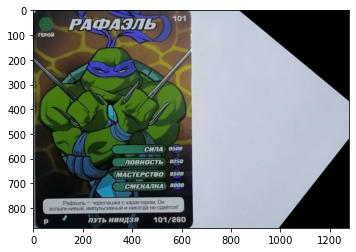

In [13]:
plt.imshow(X_rafael[0])
plt.show()

Все додаю в одну змінну X і labels в target

In [14]:
X = []
target = []

In [15]:
X = X_not_item.copy()
target = [0 for i in range(len(X_not_item))]

for i in X_rafael:
    X.append(i)

for i in target_rafael:
    target.append(i)
    
for i in X_dragon:
    X.append(i)

for i in target_dragon:
    target.append(i)
    
for i in X_double:
    X.append(i)

In [16]:
for i in range(2, len(target_double)):
    target.append(target_double[i])

Робимо ресайз, для зменшення використання па'мяті ПК

In [17]:
X_new = []
for i in X:
    X_new.append(cv2.resize(i, (64,64)))

In [18]:
print(len(X_new))

106


In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf

Кодую target за допомогою one_hot

In [20]:
Y = np.zeros((len(target), 4))
for i in range(len(target)):
    Y[i, target[i]] = 1

Розбиважмо вибірку

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2)

In [22]:
h_train, w_train, c_train = X_train[0].shape
print(h_train, w_train, c_train)

64 64 3


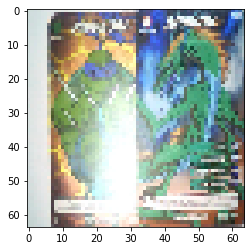

In [23]:
plt.imshow(X_train[1])
plt.show()

Це потрібно для моделі. Вона розуміє тільки масиви

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Модель взята з документаціх tenserflow, тільки з меншою кількістю нейронів

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(h_train, w_train, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1722432   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

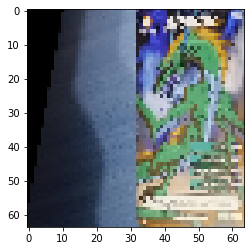

In [42]:
t = cv2.resize(X_train[0], (64,64))
plt.imshow(t)
plt.show()

Тренеруємо

In [43]:
model.fit(X_train, Y_train, epochs=6, batch_size=16)

Epoch 1/6
6/6 [==============================] - 0s 23ms/step - loss: 85.4536 - accuracy: 0.3810
Epoch 2/6
6/6 [==============================] - 0s 22ms/step - loss: 7.7988 - accuracy: 0.6429
Epoch 3/6
6/6 [==============================] - 0s 22ms/step - loss: 2.3122 - accuracy: 0.7500


Глянемо як працює на тестах

In [44]:
y_predict = model.predict(X_test)

In [45]:
print(y_predict)

[[9.79873911e-03 9.81978357e-01 4.02059313e-03 4.20232909e-03]
 [1.50108477e-07 9.99999762e-01 1.79149195e-09 9.31086177e-08]
 [1.62237405e-03 1.36928871e-01 1.22395204e-02 8.49209249e-01]
 [5.55144470e-06 9.99904156e-01 3.83658926e-06 8.63774112e-05]
 [1.17609277e-04 2.90472358e-02 3.87676337e-05 9.70796406e-01]
 [8.14912796e-01 8.90811458e-02 9.36315954e-02 2.37439270e-03]
 [3.78915854e-02 8.98181856e-01 1.40035357e-02 4.99229915e-02]
 [2.55885629e-06 9.99963522e-01 6.85674877e-08 3.38187601e-05]
 [5.52672191e-06 9.99884963e-01 1.28030342e-06 1.08230524e-04]
 [1.05740983e-05 9.99848008e-01 6.03965509e-06 1.35313341e-04]
 [4.59916517e-02 5.07085584e-02 6.35055959e-01 2.68243879e-01]
 [5.92687011e-01 2.46725887e-01 9.31872576e-02 6.73998222e-02]
 [2.59431005e-01 2.96105683e-01 1.46520212e-01 2.97943145e-01]
 [2.97288294e-03 4.83683636e-03 3.09227079e-01 6.82963192e-01]
 [6.46805740e-04 1.37816300e-04 9.93232250e-01 5.98315941e-03]
 [4.67813661e-04 4.51296829e-02 1.04271364e-03 9.533597

In [46]:
Y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [47]:
y_pr = np.argmax(y_predict, axis=1)

In [48]:
print(y_pr)

[1 1 3 1 3 0 1 1 1 1 2 0 3 3 2 3 2 0 3 1 3 1]


In [49]:
y_test = np.argmax(Y_test, axis=1)
print(y_test)

[1 1 3 1 3 0 1 1 1 1 2 3 0 3 2 3 2 0 1 1 3 1]


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
accuracy = accuracy_score(y_test, y_pr)
conf_mat = confusion_matrix(y_test, y_pr)

Дивимся на метрики

In [52]:
print(f'Accuracy: {accuracy}')
print(f'Confusion matrix:\n {conf_mat}')

Accuracy: 0.8636363636363636
Confusion matrix:
 [[2 0 0 1]
 [0 9 0 1]
 [0 0 3 0]
 [1 0 0 5]]


Тест з вебки

In [53]:
test = cv2.imread('Screenshot from 2020-11-28 21-49-45.png')

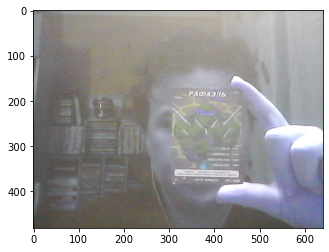

In [58]:
plt.imshow(test)
plt.show()

In [61]:
kp, des = sift.detectAndCompute(test, None)
matches = flann.knnMatch(des_double, des, k=2)
good = []

for m,n in matches:
    if m.distance < 0.75 *n.distance:
        good.append(m)

srcPts = np.float32([kp_double[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dstPts = np.float32([kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)
imgWarp = cv2.warpPerspective(test, matrix, (double.shape[1], double.shape[0]))


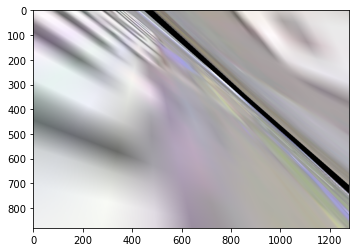

In [62]:
plt.imshow(imgWarp)
plt.show()

In [64]:
x_test = cv2.resize(imgWarp, (64,64))
np.argmax(model.predict(x_test[np.newaxis]))

2

При тумані працює погано. Тому потрібно змінити вебку, або допвнити даними з туману

In [65]:
test = cv2.imread('Screenshot from 2020-11-30 18-29-23.png')

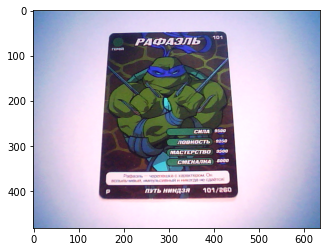

In [66]:
plt.imshow(test)
plt.show()

In [69]:
kp, des = sift.detectAndCompute(test, None)
matches = flann.knnMatch(des_double, des, k=2)
good = []

for m,n in matches:
    if m.distance < 0.75 *n.distance:
        good.append(m)

srcPts = np.float32([kp_double[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dstPts = np.float32([kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
matrix, mask = cv2.findHomography(dstPts,srcPts,cv2.RANSAC,5)
imgWarp = cv2.warpPerspective(test, matrix, (double.shape[1], double.shape[0]))


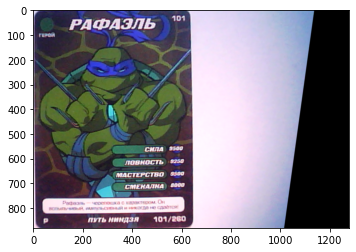

In [70]:
plt.imshow(imgWarp)
plt.show()

In [71]:
x_test = cv2.resize(imgWarp, (64,64))
model.predict(x_test[np.newaxis])

array([[7.0853828e-04, 9.9796546e-01, 2.1496578e-04, 1.1109780e-03]],
      dtype=float32)

Як бачимо працює супер

Запам'ятовуємо модель

In [72]:
model.save('new_model_v_02')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: new_model_v_02/assets
